In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
from datetime import date, datetime

## 1. Load the GUS data on Inflation

In [2]:
data = pd.read_csv(
    Path(os.getcwd()) / "data" / "monthly_GUS_data_2024-02-03.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearmon"])

In [3]:
data = data.set_index("yearmon")

In [4]:
data.head(3)

,CPI_inflation_MoM,CPI_inflation_YoY,newly_built_flats_count
yearmon,,,
2000-01-01,101.8,110.1,5796
2000-02-01,100.9,110.4,6199
2000-03-01,100.9,110.3,5977


## 2. Quick Look at the Full History of GUS CPI Inflation

In [6]:
data["CPI_MoM_rate"] = data["CPI_inflation_MoM"] - 100
data["CPI_YoY_rate"] = data["CPI_inflation_YoY"] - 100

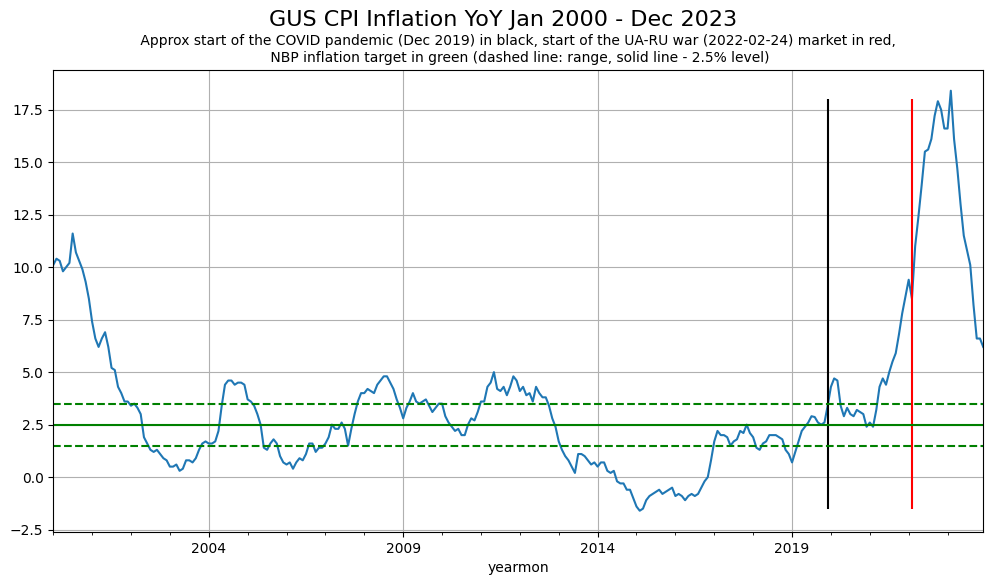

In [7]:
plt.figure(figsize=(12, 6))
data["CPI_YoY_rate"].plot()
plt.suptitle("GUS CPI Inflation YoY Jan 2000 - Dec 2023", size=16)
plt.title(" Approx start of the COVID pandemic (Dec 2019) in black, start of the UA-RU war (2022-02-24) market in red, \n NBP inflation target in green (dashed line: range, solid line - 2.5% level)", size=10)
plt.vlines(x=date(2022, 2, 24), ymin=-1.5, ymax=18, color="red")
plt.vlines(x=date(2019, 12, 15), ymin=-1.5, ymax=18, color="black")
plt.hlines(y=[1.5, 3.5], xmin=date(2000, 1, 1), xmax=date(2023, 12, 31), color="green", linestyles="dashed")
plt.hlines(y=2.5, xmin=date(2000, 1, 1), xmax=date(2023, 12, 31), color="green", linestyles="solid")
plt.grid()

In [8]:
data.head()

,CPI_inflation_MoM,CPI_inflation_YoY,newly_built_flats_count,CPI_MoM_rate,CPI_YoY_rate
yearmon,,,,,
2000-01-01,101.8,110.1,5796,1.8,10.1
2000-02-01,100.9,110.4,6199,0.9,10.4
2000-03-01,100.9,110.3,5977,0.9,10.3
2000-04-01,100.4,109.8,5360,0.4,9.8
2000-05-01,100.7,110.0,5955,0.7,10.0


Text(0.5, 0.98, 'Rates of CPI inflation: YoY and MoM, 2000-2023')

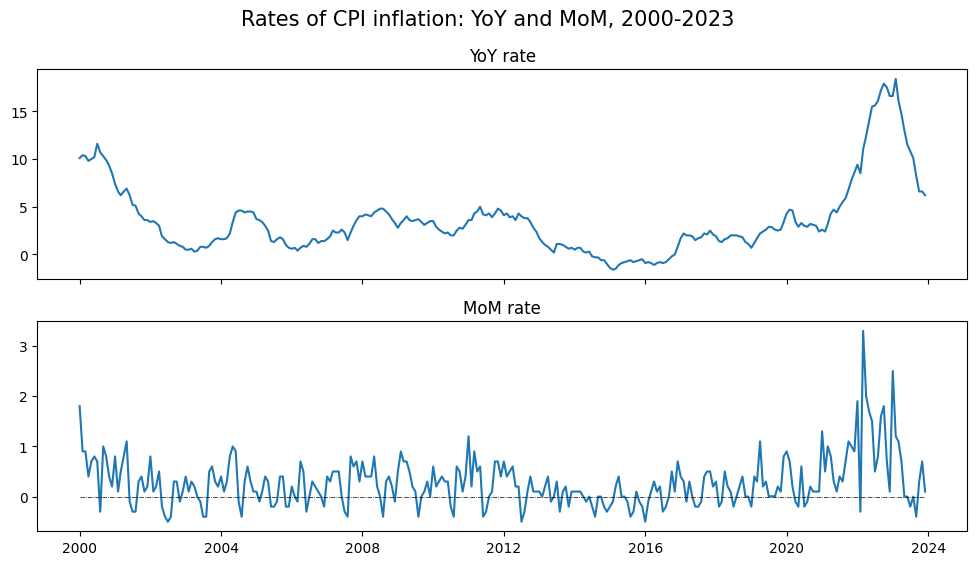

In [49]:
fig_rates = plt.figure(figsize=(12, 6))
ax_upper, ax_lower = fig_rates.subplots(2, 1, sharex=True)
ax_upper.plot(data.index, data["CPI_YoY_rate"])
ax_upper.set_title("YoY rate")
ax_lower.plot(data.index, data["CPI_MoM_rate"])
ax_lower.set_title("MoM rate")
ax_lower.set_yticks([-1, 0, 1, 2, 3])
ax_lower.plot(data.index, [0] * len(data.index), color="black", linestyle="-.", linewidth=0.5)
fig_rates.suptitle("Rates of CPI inflation: YoY and MoM, 2000-2023", size=15)
# ax_upper = fig_rates.add_subplot(2, 1, 1)
# ax_lower = fig_rates.add_subplot(2, 1, 2)

## 3. Cumulative Growth of the Level of Consumer Prices in the Years 2000-2023

In [51]:
data["price_level"] = (data["CPI_inflation_MoM"] / 100).cumprod()

Text(0.5, 1.0, 'index: XII 1999=~1')

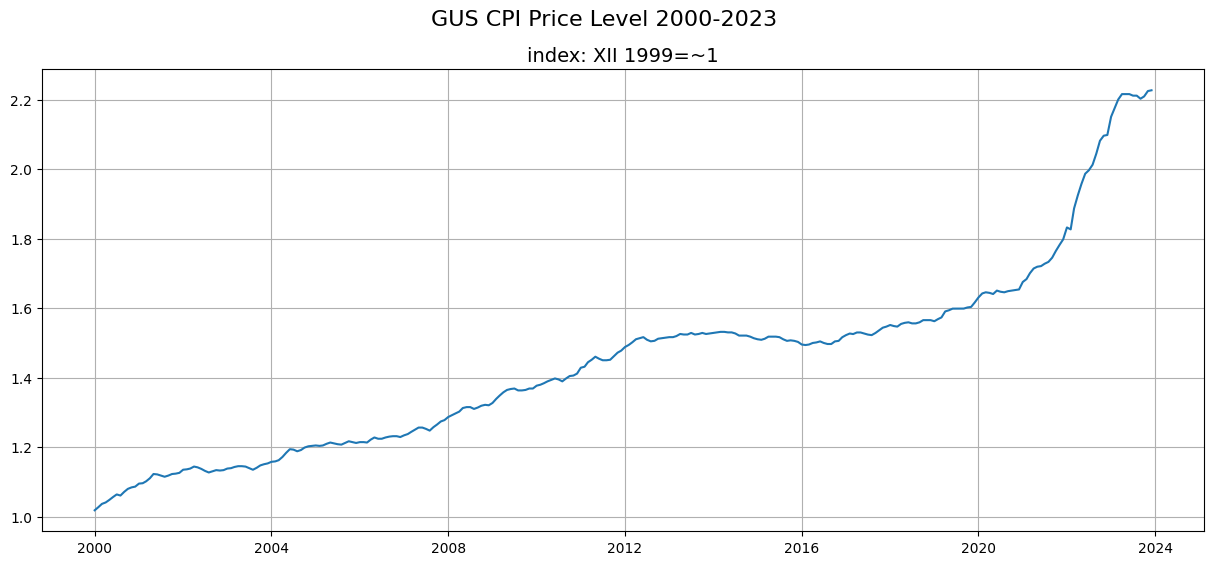

In [76]:
fig_prlvl = plt.figure(figsize=(15, 6))
ax = fig_prlvl.add_subplot(1, 1, 1)
ax.plot(data.index, data["price_level"])
ax.grid()
fig_prlvl.suptitle("GUS CPI Price Level 2000-2023", size=16)
ax.set_title("index: XII 1999=~1", size=14)

In [53]:
data.tail(3)

,CPI_inflation_MoM,CPI_inflation_YoY,newly_built_flats_count,CPI_MoM_rate,CPI_YoY_rate,price_level
yearmon,,,,,,
2023-10-01,100.3,106.6,19549,0.3,6.6,2.208960
2023-11-01,100.7,106.6,18905,0.7,6.6,2.224423
2023-12-01,100.1,106.2,20772,0.1,6.2,2.226647


## 3. Zooming in the Period Since 2019

In [78]:
data_s19 = data["2019-01-01":].copy(deep=True)

In [81]:
data_s19["price_level"] = (data_s19["CPI_inflation_MoM"] / 100).cumprod()

Text(0.5, 1.0, 'index: XII 2018 XII=~1')

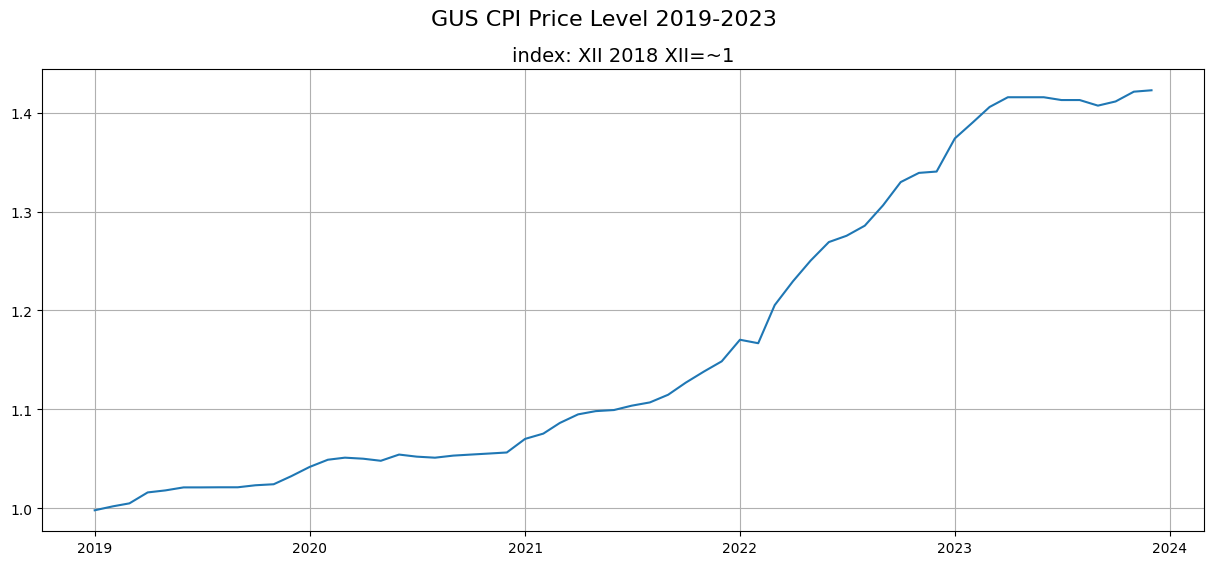

In [84]:
fig_prlvl = plt.figure(figsize=(15, 6))
ax = fig_prlvl.add_subplot(1, 1, 1)
ax.plot(data_s19.index, data_s19["price_level"])
ax.grid()
fig_prlvl.suptitle("GUS CPI Price Level 2019-2023", size=16)
ax.set_title("index: XII 2018 XII=~1", size=14)